<a href="https://colab.research.google.com/github/BhavanaPerecharla/ZEOTAP/blob/main/BHAVANA_PERECHARLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


In [126]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')


In [127]:
# Display first 5 rows of each dataset
print("First 5 rows of Customers dataset:")
print(customers.head())

print("\nFirst 5 rows of Products dataset:")
print(products.head())

print("\nFirst 5 rows of Transactions dataset:")
print(transactions.head())

First 5 rows of Customers dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

First 5 rows of Products dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

First 5 rows of Transactions dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  202

In [128]:
# Task 1: Exploratory Data Analysis (EDA)
# Basic information and summary
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

In [129]:
# Check for missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [130]:
# Summary statistics
print("\nCustomers Dataset Description:")
print(customers.describe(include='all'))
print("\nProducts Dataset Description:")
print(products.describe(include='all'))
print("\nTransactions Dataset Description:")
print(transactions.describe())


Customers Dataset Description:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Dataset Description:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%         

In [131]:
# Merge datasets for combined analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Check merged data
print("\nMerged Data:\n", merged_data.head())

# Summary statistics
print("\nSummary Statistics:\n", merged_data.describe())



Merged Data:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bl

# Data visualization
SOUTH AMERICA HAS HIGHEST NUMBER OF CUSTOMERS.

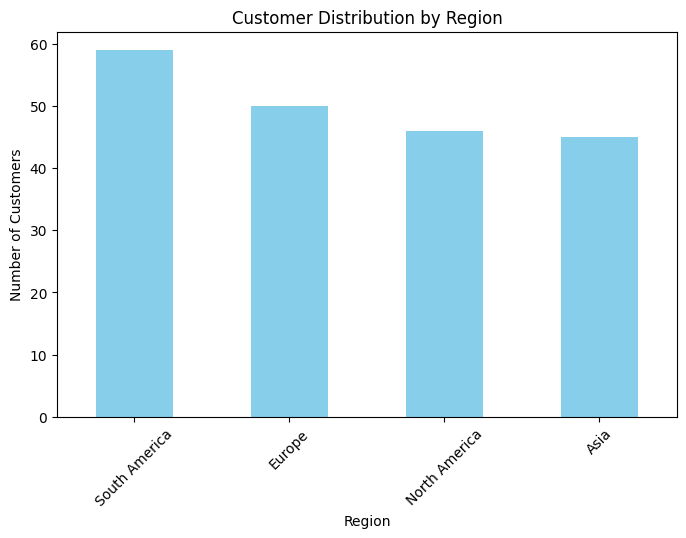

In [132]:
# 1. Customer Distribution by Region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Region-wise Sales


In [133]:
# Region-wise Sales
total_sales_by_region = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRegion-wise Total Sales:")
print(total_sales_by_region)


Region-wise Total Sales:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


The top 3 highest-selling products in each region

In [134]:
# Group by Region and ProductName, and sum the TotalValue
region_product_sales = merged_data.groupby(['Region', 'ProductName'])['TotalValue'].sum().reset_index()

# Get the top 3 highest-selling products in each region
top_3_sales_per_region = region_product_sales.groupby('Region').apply(lambda x: x.nlargest(3, 'TotalValue')).reset_index(drop=True)

print("\nTop 3 Selling Products in Each Region:\n", top_3_sales_per_region)



Top 3 Selling Products in Each Region:
            Region            ProductName  TotalValue
0            Asia      BookWorld Sweater     7266.20
1            Asia  ActiveWear Smartwatch     6927.67
2            Asia      ActiveWear Jacket     6614.26
3          Europe     BookWorld Cookbook     8360.56
4          Europe  ActiveWear Smartwatch     7861.70
5          Europe         ActiveWear Rug     7488.25
6   North America  ActiveWear Smartwatch    10080.99
7   North America   SoundWave Headphones     9479.35
8   North America  ComfortLiving Sweater     6551.29
9   South America  ActiveWear Smartwatch    14226.61
10  South America    ActiveWear Textbook    11296.11
11  South America     TechPro Headphones     9540.08


<ipython-input-134-e8c5dcf2d8a8>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_sales_per_region = region_product_sales.groupby('Region').apply(lambda x: x.nlargest(3, 'TotalValue')).reset_index(drop=True)


NO OF UNIQUE PRODUCTS IN EACH CATEGORY

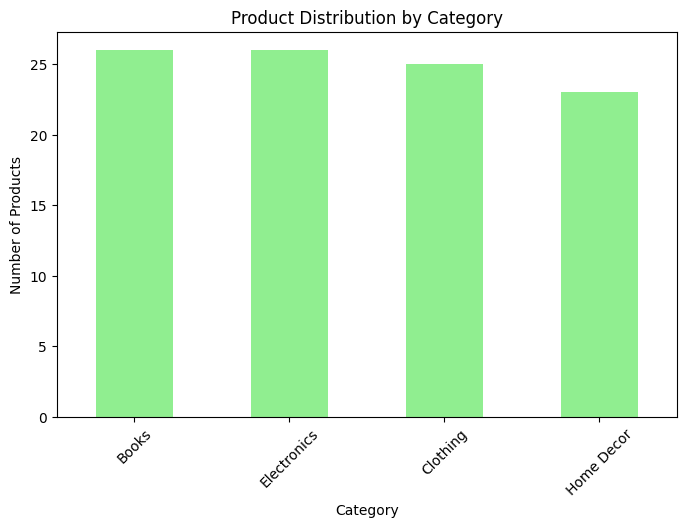

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [135]:
# 2. Product Category Distribution
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()
print(category_counts)

MONTHLY SALES TRENDS OF THE BUSSINESS

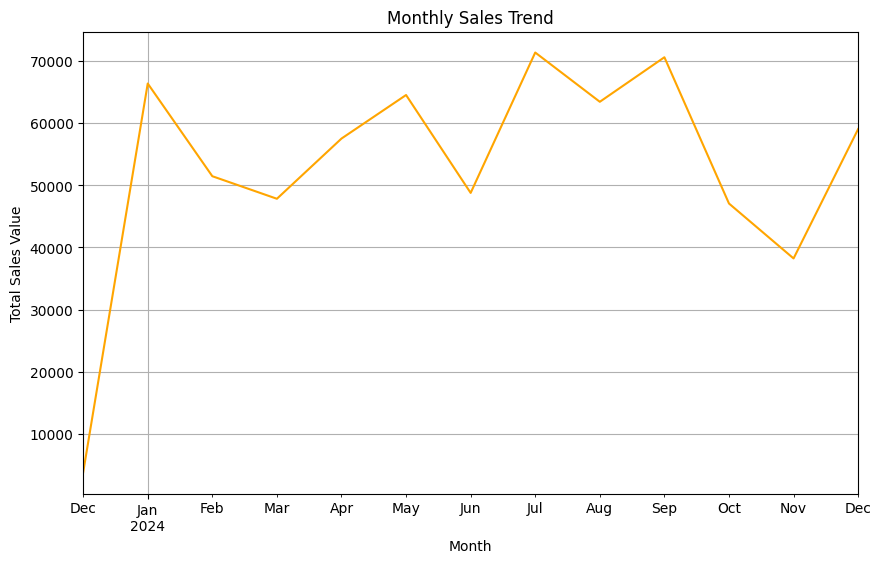

In [136]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
# Group by the month period and sum only the relevant numerical columns
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trend.plot(figsize=(10, 6), color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid()
plt.show()


Top 10 Products by Quantity Sold

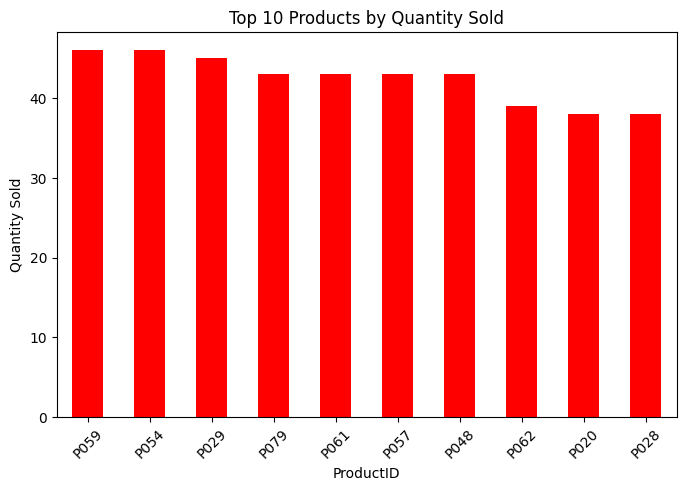

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


In [137]:
# 5. Top 10 Products by Quantity Sold
top_products = merged_data.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='red')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('ProductID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()
print(top_products)

CATEGORY WISE SALES

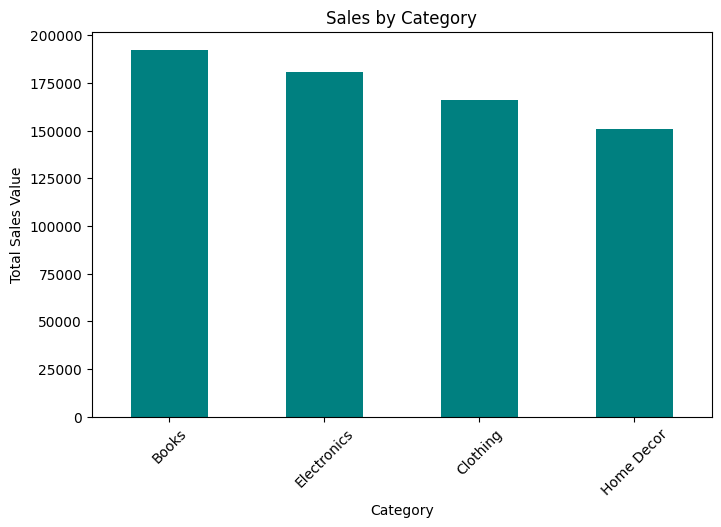

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [138]:
# Which Category Has Highest Sales [Category and Total Value]
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='teal')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()
print(category_sales)

<ipython-input-139-a972523ad4a6>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_products_per_category = category_product_sales.groupby('Category').apply(
<ipython-input-139-a972523ad4a6>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_5_products_per_category,


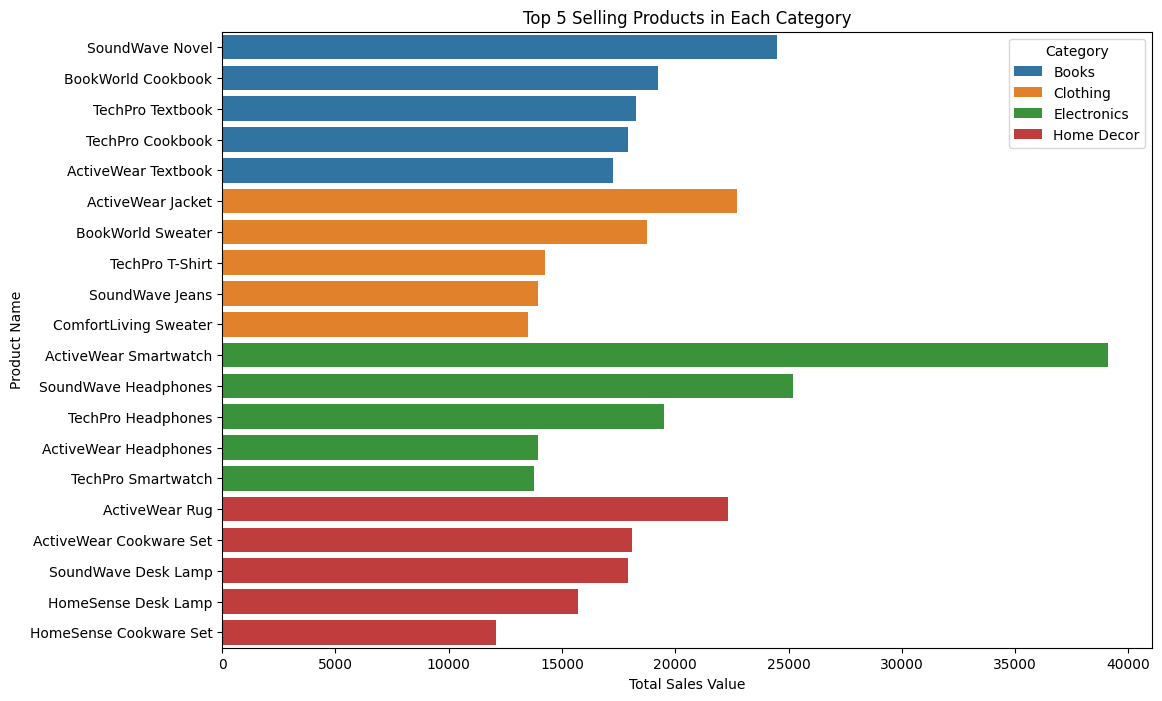


Top 5 Products in Books:
SoundWave Novel
BookWorld Cookbook
TechPro Textbook
TechPro Cookbook
ActiveWear Textbook

Top 5 Products in Clothing:
ActiveWear Jacket
BookWorld Sweater
TechPro T-Shirt
SoundWave Jeans
ComfortLiving Sweater

Top 5 Products in Electronics:
ActiveWear Smartwatch
SoundWave Headphones
TechPro Headphones
ActiveWear Headphones
TechPro Smartwatch

Top 5 Products in Home Decor:
ActiveWear Rug
ActiveWear Cookware Set
SoundWave Desk Lamp
HomeSense Desk Lamp
HomeSense Cookware Set


<ipython-input-139-a972523ad4a6>:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_products_per_category = category_product_sales.groupby('Category').apply(


In [139]:
# Grouping by 'Category' and 'ProductName' to get total sales
category_product_sales = merged_data.groupby(['Category', 'ProductName'])['TotalValue'].sum().reset_index()


top_5_products_per_category = category_product_sales.groupby('Category').apply(
    lambda x: x.nlargest(5, 'TotalValue')
).reset_index(drop=True)

# Explicitly removing grouping columns to prevent future issues
top_5_products_per_category = top_5_products_per_category[['Category', 'ProductName', 'TotalValue']]

# Plotting the top 5 products per category
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_products_per_category,
            x='TotalValue',
            y='ProductName',
            hue='Category',
            ci=None,
            dodge=False)

plt.title("Top 5 Selling Products in Each Category")
plt.xlabel("Total Sales Value")
plt.ylabel("Product Name")
plt.show()

# Grouping by 'Category' and 'ProductName' to get total sales
category_product_sales = merged_data.groupby(['Category', 'ProductName'])['TotalValue'].sum().reset_index()

# Get the top 5 products per category
top_5_products_per_category = category_product_sales.groupby('Category').apply(
    lambda x: x.nlargest(5, 'TotalValue')
).reset_index(drop=True)

# Extract only 'Category' and 'ProductName' columns
top_5_products_names = top_5_products_per_category[['Category', 'ProductName']]

# Display the top 5 products for each category
for category in top_5_products_names['Category'].unique():
    print(f"\nTop 5 Products in {category}:")
    top_products_in_category = top_5_products_names[top_5_products_names['Category'] == category]['ProductName'].tolist()
    print("\n".join(top_products_in_category))


The  Products with Least Sales (Total Value)

<ipython-input-140-f09552c9be00>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=least_sales_10, x='ProductID', y='TotalValue', palette='Blues')


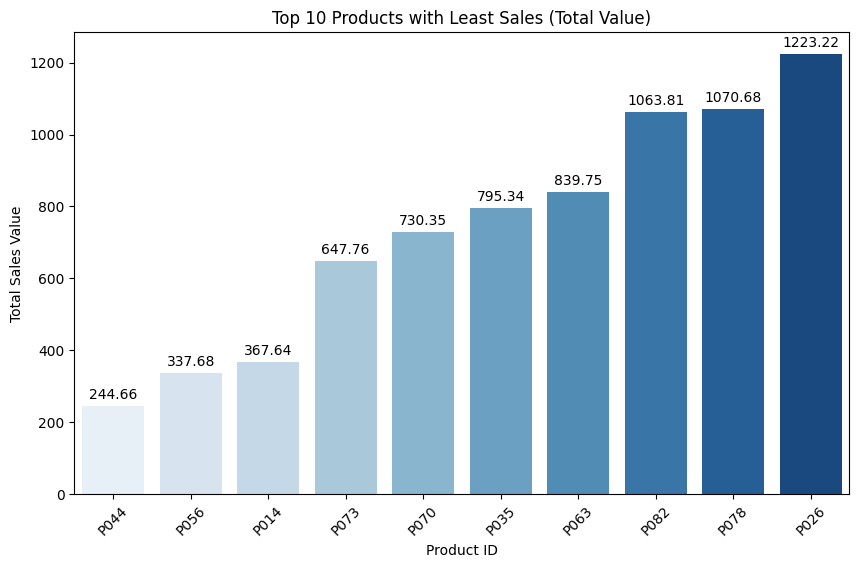

Top 10 Products with Least Sales (Total Value):
  ProductID  TotalValue
0      P044      244.66
1      P056      337.68
2      P014      367.64
3      P073      647.76
4      P070      730.35
5      P035      795.34
6      P063      839.75
7      P082     1063.81
8      P078     1070.68
9      P026     1223.22


In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_least_sales():
    # Aggregating by ProductID and calculating sum of Quantity and TotalValue
    least_sales = transactions.groupby('ProductID').agg({
        'Quantity': 'sum',
        'TotalValue': 'sum'
    }).sort_values(by='TotalValue').reset_index()

    # Get the least 10 products by total sales value
    least_sales_10 = least_sales.head(10)

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=least_sales_10, x='ProductID', y='TotalValue', palette='Blues')

    # Add title and labels
    plt.title('Top 10 Products with Least Sales (Total Value)')
    plt.xticks(rotation=45)
    plt.xlabel('Product ID')
    plt.ylabel('Total Sales Value')

    # Display the sales value on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',  # Sales value formatted to 2 decimal places
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position on top of the bar
                    ha='center', va='center',  # Align text at the center
                    fontsize=10, color='black',  # Text settings
                    xytext=(0, 8), textcoords='offset points')  # Offset the text a little upwards

    # Show the plot
    plt.show()
    print("Top 10 Products with Least Sales (Total Value):")
    print(least_sales_10[['ProductID', 'TotalValue']])
# Call the function to plot the chart with numerical values
plot_least_sales()


<ipython-input-141-f8935c37896b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=most_sales_10, x='ProductID', y='TotalValue', palette='Blues')


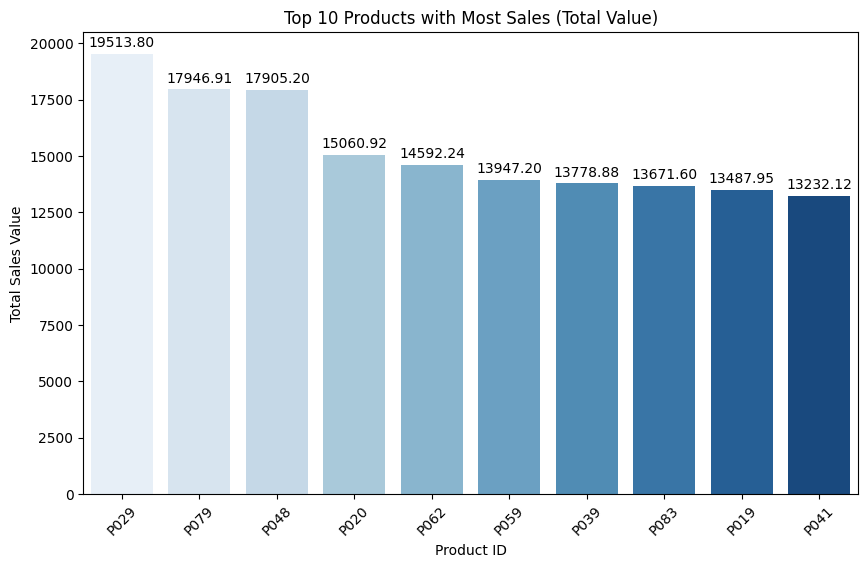

Top 10 Products with Most Sales (Total Value):
  ProductID  TotalValue
0      P029    19513.80
1      P079    17946.91
2      P048    17905.20
3      P020    15060.92
4      P062    14592.24
5      P059    13947.20
6      P039    13778.88
7      P083    13671.60
8      P019    13487.95
9      P041    13232.12


In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_most_sales():
    # Aggregating by ProductID and calculating sum of Quantity and TotalValue
    most_sales = transactions.groupby('ProductID').agg({
        'Quantity': 'sum',
        'TotalValue': 'sum'
    }).sort_values(by='TotalValue', ascending=False).reset_index()

    # Get the most 10 products by total sales value
    most_sales_10 = most_sales.head(10)

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=most_sales_10, x='ProductID', y='TotalValue', palette='Blues')

    # Add title and labels
    plt.title('Top 10 Products with Most Sales (Total Value)')
    plt.xticks(rotation=45)
    plt.xlabel('Product ID')
    plt.ylabel('Total Sales Value')

    # Display the sales value on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',  # Sales value formatted to 2 decimal places
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position on top of the bar
                    ha='center', va='center',  # Align text at the center
                    fontsize=10, color='black',  # Text settings
                    xytext=(0, 8), textcoords='offset points')  # Offset the text a little upwards

    # Show the plot
    plt.show()

    # Print the table with top 10 products and their total sales value
    print("Top 10 Products with Most Sales (Total Value):")
    print(most_sales_10[['ProductID', 'TotalValue']])

# Call the function to plot the chart with numerical values
plot_most_sales()


In [142]:
# Average Sales per Transaction
avg_sales_per_transaction = transactions['TotalValue'].mean()
print("\nAverage Sales per Transaction:", avg_sales_per_transaction)


Average Sales per Transaction: 689.9955600000001


In [143]:
# Top 10 Customers by Total Spend
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Spend:")
print(top_customers)


Top 10 Customers by Total Spend:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [144]:
# Products with Zero Sales
products_with_zero_sales = products[~products['ProductID'].isin(transactions['ProductID'])]
print("\nProducts with Zero Sales:")
print(products_with_zero_sales)


Products with Zero Sales:
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


<Figure size 1200x600 with 0 Axes>

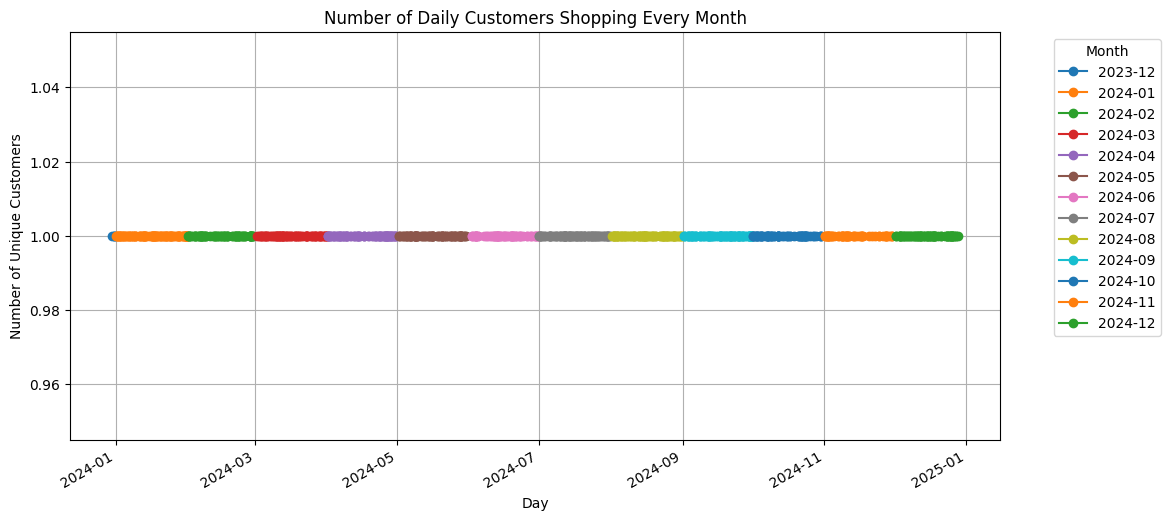

In [145]:
daily_customers = merged_data.groupby([merged_data['TransactionDate'].dt.to_period('M'), 'TransactionDate']).nunique()['CustomerID']
plt.figure(figsize=(12, 6))
daily_customers.unstack(level=0).plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Number of Daily Customers Shopping Every Month')
plt.xlabel('Day')
plt.ylabel('Number of Unique Customers')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


TASK 2


Lookalike model results saved as 'Lookalike.csv'.
CustomerID: C0001, Lookalikes: [('C0069', 0.96), ('C0146', 0.95), ('C0035', 0.92)]
CustomerID: C0002, Lookalikes: [('C0029', 1.0), ('C0077', 0.98), ('C0088', 0.97)]
CustomerID: C0003, Lookalikes: [('C0160', 0.92), ('C0086', 0.87), ('C0038', 0.86)]
CustomerID: C0004, Lookalikes: [('C0075', 1.0), ('C0175', 1.0), ('C0165', 0.99)]
CustomerID: C0005, Lookalikes: [('C0112', 0.99), ('C0095', 0.99), ('C0197', 0.98)]
CustomerID: C0006, Lookalikes: [('C0117', 1.0), ('C0168', 0.99), ('C0187', 0.98)]
CustomerID: C0007, Lookalikes: [('C0140', 0.99), ('C0120', 0.99), ('C0020', 0.97)]
CustomerID: C0008, Lookalikes: [('C0113', 0.98), ('C0017', 0.95), ('C0024', 0.95)]
CustomerID: C0009, Lookalikes: [('C0083', 1.0), ('C0033', 0.99), ('C0077', 0.98)]
CustomerID: C0010, Lookalikes: [('C0029', 0.97), ('C0002', 0.97), ('C0030', 0.96)]
CustomerID: C0011, Lookalikes: [('C0171', 1.0), ('C0064', 0.99), ('C0096', 0.95)]
CustomerID: C0012, Lookalikes: [('C0104', 

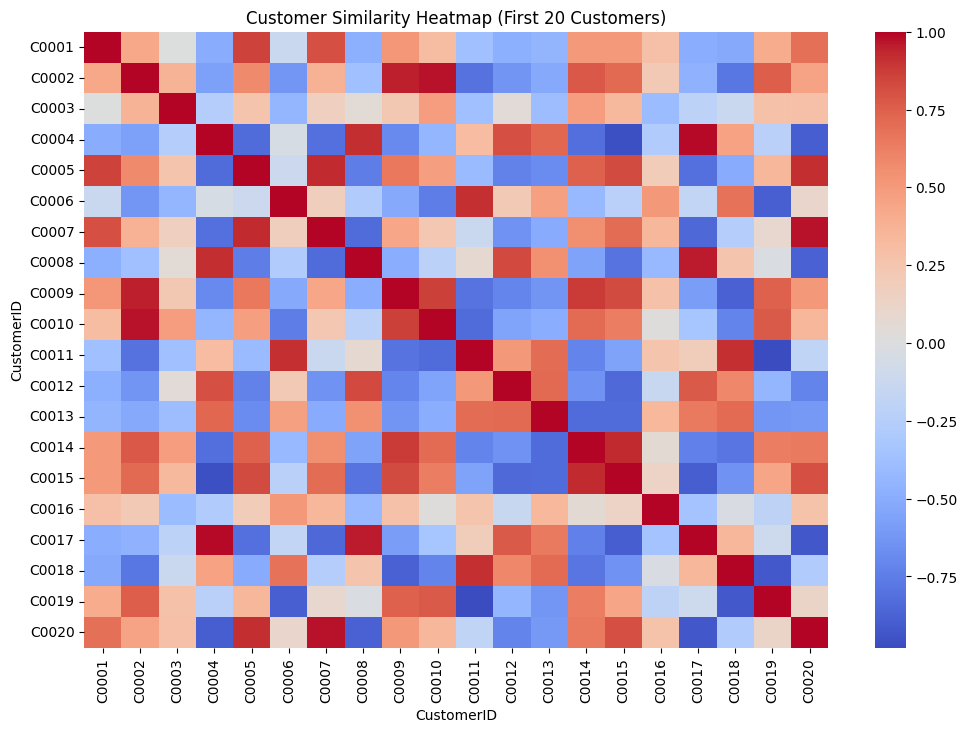

In [146]:
#Feature Engineering: Create customer-level and product-level features
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Number of transactions
    'Category': lambda x: x.mode()[0],  # Most frequently purchased category
    'TotalValue': 'mean',  # Average transaction value
}).rename(columns={
    'TransactionID': 'NumTransactions',
    'TotalValue': 'AvgTransactionValue',
    'Category': 'FrequentCategory'
}).reset_index()

product_features = merged_data.groupby('ProductID').agg({
    'Category': lambda x: x.mode()[0],  # Most common category
    'ProductName': 'first',  # Product name
    'Quantity': 'sum',  # Total quantity sold
}).reset_index()

# Encode categorical variables
customer_features = pd.get_dummies(customer_features, columns=['FrequentCategory'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
num_features = ['AvgTransactionValue', 'NumTransactions']
customer_features[num_features] = scaler.fit_transform(customer_features[num_features])

# Compute similarity metrics
customer_ids = customer_features['CustomerID']
customer_data = customer_features.drop(columns=['CustomerID'])
profile_similarity = cosine_similarity(customer_data)

# Behavioral similarity (transaction history)
transaction_features = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()
transaction_features[['Quantity', 'TotalValue']] = scaler.fit_transform(transaction_features[['Quantity', 'TotalValue']])
behavioral_similarity = cosine_similarity(transaction_features.drop(columns=['CustomerID']))

# Combine similarity metrics
alpha, beta = 0.5, 0.5  # Weights for combining similarities
final_similarity = alpha * profile_similarity + beta * behavioral_similarity

# Find top 3 lookalike customers for each customer
lookalike_map = {}
for idx, customer_id in enumerate(customer_ids):
    similarity_scores = list(enumerate(final_similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_3 = [(customer_ids[i], round(score, 2)) for i, score in similarity_scores[1:4]]  # Exclude self
    lookalike_map[customer_id] = top_3

# Generate Lookalike.csv
lookalike_df = pd.DataFrame([
    {'CustomerID': cust_id, 'Lookalikes': lookalikes}
    for cust_id, lookalikes in lookalike_map.items()
])
lookalike_df.to_csv('Lookalike.csv', index=False)
print("\nLookalike model results saved as 'Lookalike.csv'.")

# Display lookalikes for first 20 customers (C0001 - C0020)
for cust_id in customer_ids[:20]:
    print(f"CustomerID: {cust_id}, Lookalikes: {lookalike_map[cust_id]}")

# Visualization of similarity matrix (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(final_similarity[:20, :20], annot=False, cmap='coolwarm', xticklabels=customer_ids[:20], yticklabels=customer_ids[:20])
plt.title('Customer Similarity Heatmap (First 20 Customers)')
plt.xlabel('CustomerID')
plt.ylabel('CustomerID')
plt.show()

TASK 3

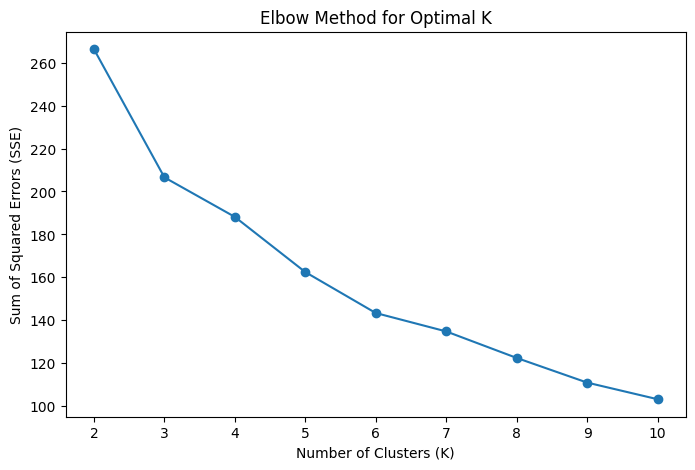

In [147]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Merge datasets
transactions_merged = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Step 2: Aggregate transaction information to create customer-level features
customer_features = transactions_merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Purchase frequency
    'Category': lambda x: x.mode()[0],  # Most purchased product category
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'PurchaseFrequency',
    'Category': 'MostPurchasedCategory'
}).reset_index()

# Step 3: Encode categorical variables
customer_features = pd.get_dummies(customer_features, columns=['MostPurchasedCategory'], drop_first=True)

# Step 4: Normalize numerical features
scaler = StandardScaler()
numeric_features = ['TotalSpending', 'PurchaseFrequency']
customer_features[numeric_features] = scaler.fit_transform(customer_features[numeric_features])

# Step 5: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
customer_features_pca = pca.fit_transform(customer_features.drop(columns=['CustomerID']))

# Step 6: Clustering
# Using K-Means as the primary algorithm
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features.drop(columns=['CustomerID']))
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()




Silhouette Score: 0.23
Davies-Bouldin Index: 1.51


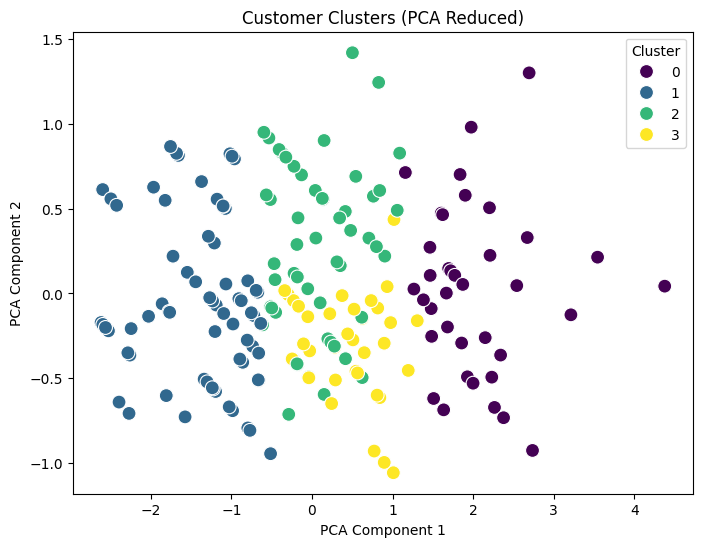

In [148]:

# Optimal K (choose based on the elbow point)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(customer_features.drop(columns=['CustomerID']))

# Add cluster labels to customer features
groups = customer_features.copy()
groups['Cluster'] = kmeans_labels

# Step 7: Evaluate Clustering
silhouette_avg = silhouette_score(customer_features.drop(columns=['CustomerID']), kmeans_labels)
db_index = davies_bouldin_score(customer_features.drop(columns=['CustomerID']), kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Step 8: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_features_pca[:, 0], y=customer_features_pca[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [149]:

# Step 9: Additional Insights

#Select only numeric columns before performing groupby().mean()
numeric_columns = groups.select_dtypes(include=['number']).columns

# Perform groupby and calculate mean on numeric columns only
cluster_analysis = groups[numeric_columns].groupby('Cluster').mean()

print("Cluster Analysis:\n", cluster_analysis)


# Save clusters to a CSV file
groups.to_csv('CustomerClusters.csv', index=False)
print("Customer clustering results saved as 'CustomerClusters.csv'.")

Cluster Analysis:
          TotalSpending  PurchaseFrequency
Cluster                                  
0             1.443846           1.442927
1            -0.945309          -1.008222
2            -0.136753           0.237289
3             0.547859           0.111795
Customer clustering results saved as 'CustomerClusters.csv'.
